In [503]:
#import matplotlib
import pandas as pd
import numpy as np
import math
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/Users/suvojitdutta/Documents/PYTHON/Files/Titanic/kaggle_train.csv", encoding = "ISO-8859-1", error_bad_lines=False)


In [504]:
%pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [505]:
#remove rows that are null
df = df[np.isfinite(df['pclass'])]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
passengerId    891 non-null int64
survived       891 non-null int64
pclass         891 non-null int64
name           891 non-null object
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
ticket         891 non-null object
fare           891 non-null float64
cabin          204 non-null object
embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [506]:
#Create missing value report
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
print ("\nMissing values per row:")
print (df.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row

Missing values per column:
passengerId      0
survived         0
pclass           0
name             0
sex              0
age            177
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

Missing values per row:
0    1
1    0
2    1
3    0
4    1
dtype: int64


In [507]:
#Explore values of pclass 
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

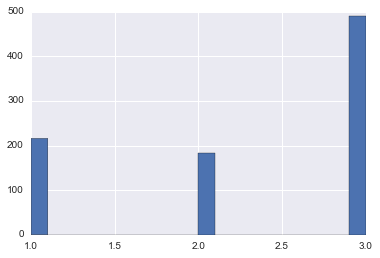

In [508]:
#pclass histogram
%matplotlib inline
df['pclass'].hist(bins=20)


In [509]:
#Explore values of survived 
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

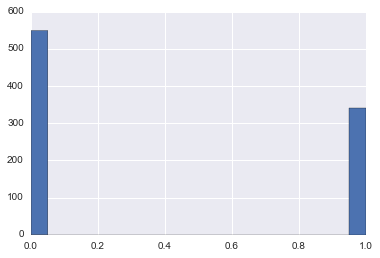

In [510]:
#survived histogram
%matplotlib inline
df['survived'].hist(bins=20)

In [511]:
#Explore values of sex 
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [512]:
#Explore values of age 
df['age'].value_counts()
#df[['age']].sort_values(by=["age"], ascending=[True])

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
30.00    25
21.00    24
25.00    23
36.00    22
29.00    20
27.00    18
35.00    18
26.00    18
32.00    18
31.00    17
16.00    17
23.00    15
20.00    15
34.00    15
33.00    15
39.00    14
17.00    13
40.00    13
42.00    13
45.00    12
38.00    11
50.00    10
2.00     10
4.00     10
48.00     9
         ..
0.75      2
45.50     2
64.00     2
30.50     2
0.83      2
32.50     2
40.50     2
71.00     2
28.50     2
63.00     2
59.00     2
57.00     2
55.00     2
70.00     2
55.50     1
24.50     1
34.50     1
0.92      1
36.50     1
0.42      1
23.50     1
12.00     1
20.50     1
14.50     1
80.00     1
74.00     1
70.50     1
66.00     1
53.00     1
0.67      1
Name: age, dtype: int64

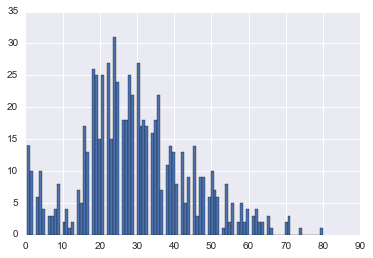

In [513]:
df['age'].hist(bins=100)

# Impute NULL age

In [514]:
#age mean
df.age.mean()

29.69911764705882

In [515]:
#age median
df.age.median()

28.0

In [516]:
df.age.mode()

0    24.0
dtype: float64

In [517]:
#Filer ages of male
df_male = df.loc[(df["sex"]=="male")]


In [518]:
#Check age distribution for male
df_male.age.value_counts()

28.00    18
25.00    18
19.00    18
21.00    17
36.00    15
32.00    15
22.00    15
30.00    14
24.00    14
29.00    13
18.00    13
20.00    13
26.00    13
27.00    12
34.00    11
16.00    11
35.00    10
31.00    10
23.00    10
42.00    10
33.00     9
39.00     8
47.00     7
17.00     7
40.00     7
38.00     6
45.00     6
51.00     6
44.00     6
37.00     5
         ..
40.50     2
8.00      2
71.00     2
0.83      2
64.00     2
59.00     2
58.00     2
45.50     2
70.00     2
6.00      1
32.50     1
10.00     1
34.50     1
12.00     1
55.00     1
15.00     1
20.50     1
30.50     1
0.92      1
24.50     1
23.50     1
0.42      1
80.00     1
74.00     1
70.50     1
66.00     1
36.50     1
57.00     1
55.50     1
0.67      1
Name: age, dtype: int64

In [519]:
#Check age distribution of survived male
df_male_survived = df_male.loc[(df["survived"]==1)]


In [520]:
#Caluclate the median of survived male age
avg_age_sur_male = df_male_survived.age.median()
avg_age_sur_male

28.0

In [521]:
#Calculate the median of dead male
df_male_dead = df_male.loc[(df["survived"]==0)]
avg_age_dead_male = df_male_dead.age.median()
avg_age_dead_male

29.0

In [522]:
#Filer ages of female
df_female = df.loc[(df["sex"]=="female")]


In [523]:
#Check age distribution for female
df_female.age.value_counts()

24.00    16
18.00    13
22.00    12
30.00    11
35.00     8
21.00     7
28.00     7
36.00     7
29.00     7
31.00     7
19.00     7
33.00     6
16.00     6
45.00     6
17.00     6
27.00     6
2.00      6
40.00     6
39.00     6
23.00     5
50.00     5
26.00     5
25.00     5
38.00     5
4.00      5
9.00      4
34.00     4
5.00      4
41.00     4
15.00     4
         ..
44.00     3
54.00     3
58.00     3
42.00     3
20.00     2
13.00     2
8.00      2
6.00      2
3.00      2
1.00      2
0.75      2
43.00     2
47.00     2
49.00     2
52.00     2
63.00     2
30.50     1
56.00     1
14.50     1
62.00     1
60.00     1
57.00     1
53.00     1
7.00      1
55.00     1
37.00     1
10.00     1
11.00     1
51.00     1
32.50     1
Name: age, dtype: int64

In [524]:
#Calculate the median of survived female
df_female_survived = df_female.loc[(df["survived"]==1)]
avg_age_sur_female = df_female_survived.age.median()
avg_age_sur_female

28.0

In [525]:
#Calculate the median of dead female
df_female_dead = df_female.loc[(df["survived"]==0)]
avg_age_dead_female = df_female_dead.age.median()
avg_age_dead_female

24.5

In [526]:
# Summarizing the median of ages as calculated--
#Survived Male median age : 27
#Dead Male median age : 29
#Survived Female median age : 28.5
#Dead Female median age : 24.5


In [527]:
#Analyze the ratio of ages that are null in the buckets -
#Male / Survived
#Male / Dead
#Female / Survived
#Female / Dead

In [528]:
#Apply boolean indexing to filter the null ages in an interim dataframe-
df_with_null_ages = df.loc[(df["age"].isnull())]

In [529]:
#Function to calculate null age for male (Survived and Dead) and female (Survived and Dead)

def fillNullAge(row):
#    x=float('nan')
    if math.isnan(row.age):
#    if row.age.isnull():
        if ((row.sex in ['male']) and (row.survived in [1])):
            output = avg_age_sur_male
        elif ((row.sex in ['male']) and (row.survived in [0])):
            output = avg_age_dead_male
        elif ((row.sex in ['female']) and (row.survived in [1])):
            output = avg_age_sur_female
        else:
            output = avg_age_dead_female
    else:
        output = row.age

    return output


In [530]:
#Impute Null age
df.age = df.apply(lambda row: fillNullAge(row), axis=1)


# Density Plots

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


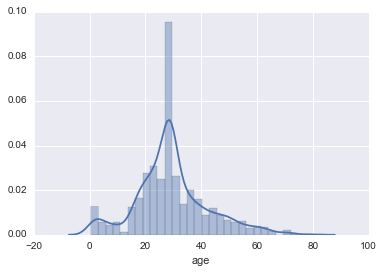

In [531]:
sns.distplot(df.age)

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


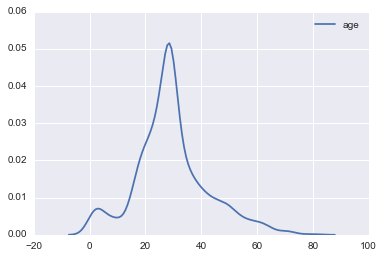

In [532]:
#kernel density estimation (KDE) 
sns.kdeplot(df.age)

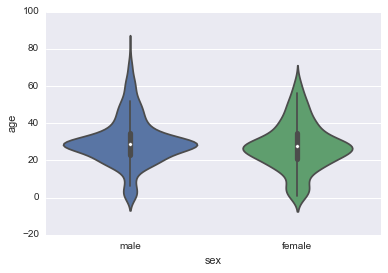

In [533]:
#Explore age by gender; draw a violin plot
import matplotlib.pyplot as plt
import seaborn as sns 
sns.violinplot(df['sex'], df['age']) #Variable Plot
sns.despine()

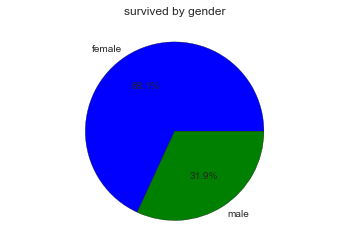

In [534]:
#Pie chart of number of survived by gender
var=df.groupby(['sex']).sum().stack()
temp=var.unstack()
type(temp)
x_list = temp['survived']
label_list = temp.index
pyplot.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("survived by gender")
plt.show()

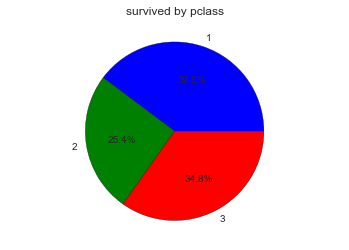

In [535]:
#Pie chart of number of survived by pclass
var=df.groupby(['pclass']).sum().stack()
temp=var.unstack()
type(temp)
x_list = temp['survived']
label_list = temp.index
pyplot.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("survived by pclass")
plt.show()

In [536]:
#Function to seperate last name from name column
def findLastName(x):
    name_str = str(x)
    output = []
    output = name_str.split(",")

    return output[0]




In [537]:
#Create Last Name column
df['lastname'] = df.name.apply(findLastName)


In [538]:
#Create a age range column
#first check the age max and min
df1 = df[['age']]
df1.describe()

,age
count,891.000000
mean,29.416016
std,13.027527
min,0.420000
25%,22.000000
50%,29.000000
75%,35.000000
max,80.000000


In [539]:
#create function to derive the age range :
def findAgeRange(x):
    if (x < 1):
        output = "1-"
    elif (x >= 1 and x <10):
        output = "1+"
    elif (x >= 10 and x <20):
        output = "10+"
    elif (x >= 20 and x <30):
        output = "20+"
    elif (x >= 30 and x <40):
        output = "30+"
    elif (x >= 40 and x <50):
        output = "40+"
    elif (x >= 50 and x <60):
        output = "50+"
    elif (x >= 60 and x <70):
        output = "60+"
    else:
        output = "70+"
    return output

In [540]:
#Create ageTange column
df['ageRange'] = df.age.apply(findAgeRange)


In [541]:
df.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [542]:
#There are two nulls in "embarked" column. Impute them with "S" given the high frequency of "S".
df['embarked'].fillna("S", inplace=True)


In [543]:
#Expand Embarked name
#Create function getEmbarkedLocation

def getEmbarkedLocation(x):
    if (x in ('C')):
        output = "Cherbourg"
    elif (x in ('Q')):
        output = "Queenstown"
    elif (x in ('S')):
        output = "Southampton"
    else:
        output = "Unknown"
    
    return output
    
    

In [544]:
#Explore Cabin to get the 1st character, like if the Cabin 'B65' we want to get 'B'.
#Write function
def getCabinID(x):
    cabin = str(x)
    if cabin == "":
        output = 'U'
    else:
        output = cabin[:1]
        
    return output

In [545]:
#Create CabinID
df['CabinID'] = df.cabin.apply(getCabinID)


In [546]:
df1 = df[['pclass', 'sex', 'survived']]

df1.groupby( [ "pclass", "sex"] )['survived'].sum()

pclass  sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: survived, dtype: int64

In [547]:
#Convert the preceeding groupby in to a dataframe and draw a distplot

df_group = pd.DataFrame({'count' : df1.groupby( [ "pclass", "sex"] )['survived'].sum()}).reset_index()
df_group.columns = ['pclass', 'sex', 'survived']
df_group

,pclass,sex,survived
0,1,female,91
1,1,male,45
2,2,female,70
3,2,male,17
4,3,female,72
5,3,male,47


/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


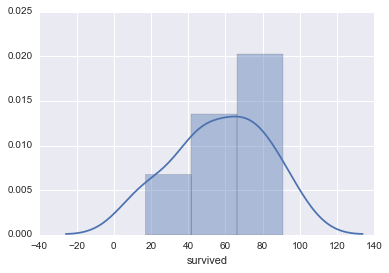

In [548]:
sns.distplot(df_group.survived)

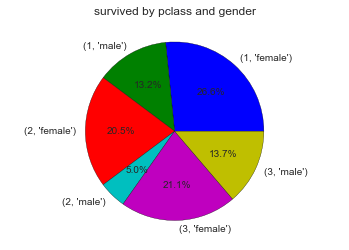

In [549]:
#Draw a pie
#Pie chart of number of survived by pclass and gender
var=df.groupby(['pclass', 'sex']).sum().stack()
temp=var.unstack()
type(temp)
x_list = temp['survived']
label_list = temp.index
pyplot.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("survived by pclass and gender")
plt.show()

In [550]:
#Create nhew column "embarkedPort"
df['embarkedPort'] = df.embarked.apply(getEmbarkedLocation)


In [551]:
#Create new dataframe
df1=df[['pclass', 'survived', 'lastname', 'sex', 'age', 'ageRange', 'sibsp', 'parch', 'ticket',
#        'CabinID', 'embarkedPort', 'boat', 'body', 'dest']]
        'CabinID', 'embarkedPort']]
df1

,pclass,survived,lastname,sex,age,ageRange,sibsp,parch,ticket,CabinID,embarkedPort
0,3,0,Braund,male,22.0,20+,1,0,A/5 21171,n,Southampton
1,1,1,Cumings,female,38.0,30+,1,0,PC 17599,C,Cherbourg
2,3,1,Heikkinen,female,26.0,20+,0,0,STON/O2. 3101282,n,Southampton
3,1,1,Futrelle,female,35.0,30+,1,0,113803,C,Southampton
4,3,0,Allen,male,35.0,30+,0,0,373450,n,Southampton
5,3,0,Moran,male,29.0,20+,0,0,330877,n,Queenstown
6,1,0,McCarthy,male,54.0,50+,0,0,17463,E,Southampton
7,3,0,Palsson,male,2.0,1+,3,1,349909,n,Southampton
8,3,1,Johnson,female,27.0,20+,0,2,347742,n,Southampton
9,2,1,Nasser,female,14.0,10+,1,0,237736,n,Cherbourg


In [552]:
#Check survival chance with gender and age
#Create pivot
temp2 = df1.pivot_table(values='survived',index=['sex', 'ageRange'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival by gender and age:') 
print (temp2)


Probility of survival by gender and age:
sex     ageRange
female  1+          0.607143
        1-          1.000000
        10+         0.755556
        20+         0.704000
        30+         0.833333
        40+         0.687500
        50+         0.888889
        60+         1.000000
male    1+          0.518519
        1-          1.000000
        10+         0.122807
        20+         0.150735
        30+         0.214953
        40+         0.210526
        50+         0.133333
        60+         0.133333
        70+         0.142857
Name: survived, dtype: float64


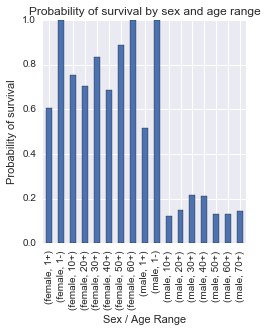

In [553]:
#Bar graph of survival probability by sex and age range

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
temp2.plot(kind = 'bar')
ax1.set_xlabel('Sex / Age Range')
ax1.set_ylabel('Probability of survival')
ax1.set_title("Probability of survival by sex and age range")

In [554]:
#Create a pivot by pclass, gender and ageRange and survival chance and draw a bar graph
#Create pivot
temp2 = df1.pivot_table(values='survived',index=['pclass', 'sex', 'ageRange'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival by class, gender and age:') 
print (temp2)


Probility of survival by class, gender and age:
pclass  sex     ageRange
1       female  1+          0.000000
                10+         1.000000
                20+         0.960000
                30+         1.000000
                40+         1.000000
                50+         0.916667
                60+         1.000000
        male    1+          1.000000
                1-          1.000000
                10+         0.400000
                20+         0.358974
                30+         0.521739
                40+         0.375000
                50+         0.266667
                60+         0.100000
                70+         0.250000
2       female  1+          1.000000
                10+         1.000000
                20+         0.888889
                30+         0.941176
                40+         0.900000
                50+         0.833333
        male    1+          1.000000
                1-          1.000000
                10+         0.100000
 

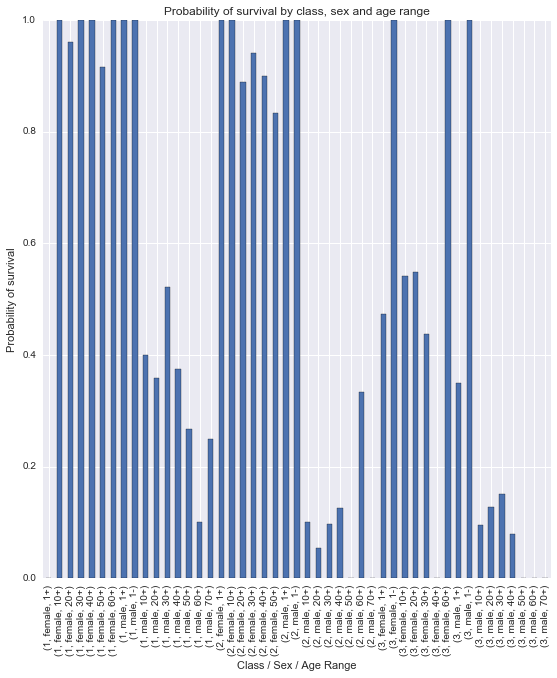

In [555]:
#Bar graph of survival probability by sex and age range

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
temp2.plot(kind = 'bar')
ax1.set_xlabel('Class / Sex / Age Range')
ax1.set_ylabel('Probability of survival')
ax1.set_title("Probability of survival by class, sex and age range")

In [556]:
#Create a Dataframe with the above pivot conntaining pclass, sex, ageRange and Survval chance

df_pivot = pd.DataFrame({'count' : df1.pivot_table(values='survived',
    index=['pclass', 'sex', 'ageRange'],aggfunc=lambda x: x.mean()*100)}).reset_index()

df_pivot.columns = ['pclass', 'sex', 'ageRange', 'Survival']
df_pivot

,pclass,sex,ageRange,Survival
0,1,female,1+,0.000000
1,1,female,10+,100.000000
2,1,female,20+,96.000000
3,1,female,30+,100.000000
4,1,female,40+,100.000000
5,1,female,50+,91.666667
6,1,female,60+,100.000000
7,1,male,1+,100.000000
8,1,male,1-,100.000000
9,1,male,10+,40.000000


In [557]:
#Check survival chance with gender 
#Create pivot
temp2 = df1.pivot_table(values='survived',index=['sex'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival by gender :') 
print (temp2)


Probility of survival by gender :
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


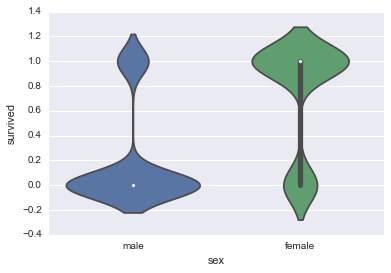

In [558]:
#Violin plot to represent survival by sex

sns.violinplot(df1['sex'], df1['survived']) #Variable Plot
sns.despine()

In [559]:
#Check survival chance with age
#Create pivot
temp2 = df1.pivot_table(values='survived',index=['ageRange'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival by age:') 
print (temp2)


Probility of survival by age:
ageRange
1+     0.563636
1-     1.000000
10+    0.401961
20+    0.324937
30+    0.437126
40+    0.382022
50+    0.416667
60+    0.315789
70+    0.142857
Name: survived, dtype: float64


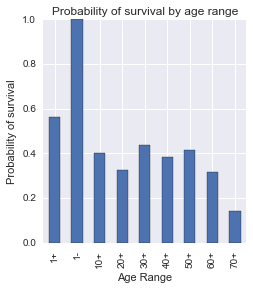

In [560]:
#Bar graph of survival probability by age range
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
temp2.plot(kind = 'bar')
ax1.set_xlabel('Age Range')
ax1.set_ylabel('Probability of survival')
ax1.set_title("Probability of survival by age range")

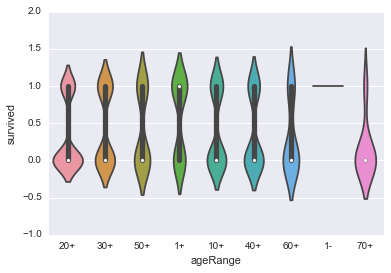

In [561]:
#Violin plot to represent survival by age
import matplotlib.pyplot as plt
import seaborn as sns 
sns.violinplot(df1['ageRange'], df1['survived']) #Variable Plot
sns.despine()

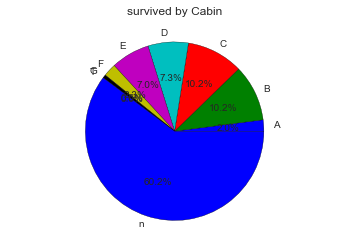

In [562]:
#Check Survival chance by CabinID
#Group Survical by CabinID
#Draw a Pie
#Pie chart of number of survived by gender
var=df.groupby(['CabinID']).sum().stack()
temp=var.unstack()
type(temp)
x_list = temp['survived']
label_list = temp.index
pyplot.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%") 
plt.title("survived by Cabin")
plt.show()

In [563]:
#Draw a Bar through Pivot
temp2 = df1.pivot_table(values='survived',index=['CabinID'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival by Cabin:') 
print (temp2)


Probility of survival by Cabin:
CabinID
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: survived, dtype: float64


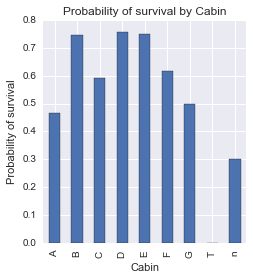

In [564]:
#Bar graph of survival probability by Cabin
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
temp2.plot(kind = 'bar')
ax1.set_xlabel('Cabin')
ax1.set_ylabel('Probability of survival')
ax1.set_title("Probability of survival by Cabin")

In [565]:
#Measure Survival chance by pclass and Cabin
#Draw a Bar through Pivot for Survival chance vs. pclass and Cabin
temp2 = df1.pivot_table(values='survived',index=['pclass', 'CabinID'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival by Class and Cabin:') 
print (temp2)


Probility of survival by Class and Cabin:
pclass  CabinID
1       A          0.466667
        B          0.744681
        C          0.593220
        D          0.758621
        E          0.720000
        T          0.000000
        n          0.475000
2       D          0.750000
        E          0.750000
        F          0.875000
        n          0.440476
3       E          1.000000
        F          0.200000
        G          0.500000
        n          0.235908
Name: survived, dtype: float64


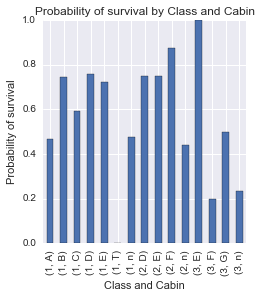

In [566]:
#Bar graph of survival probability by Class and Cabin
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
temp2.plot(kind = 'bar')
ax1.set_xlabel('Class and Cabin')
ax1.set_ylabel('Probability of survival')
ax1.set_title("Probability of survival by Class and Cabin")

In [567]:
#Measure by embarked Port
#Measure Survival chance by EmbarkedPort
#Draw a Bar through Pivot for Survival chance vs. embarked port
temp2 = df1.pivot_table(values='survived',index=['embarkedPort'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival by Embarked Port:') 
print (temp2)


Probility of survival by Embarked Port:
embarkedPort
Cherbourg      0.553571
Queenstown     0.389610
Southampton    0.339009
Name: survived, dtype: float64


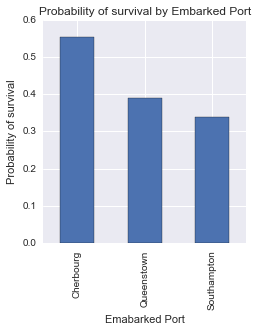

In [568]:
#Bar graph of survival probability by Embarked Port
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
temp2.plot(kind = 'bar')
ax1.set_xlabel('Emabarked Port')
ax1.set_ylabel('Probability of survival')
ax1.set_title("Probability of survival by Embarked Port")

In [569]:
#Check with parch in combo with cabin and lastname, gender. Do a pivot
temp2 = df1.pivot_table(values='survived',index=['CabinID', 'ticket', 'lastname', 'sex', 'parch', 'sibsp'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival by Cabib, lastname, gender, parch, sibsp:') 
print (temp2)


Probility of survival by Cabib, lastname, gender, parch, sibsp:
CabinID  ticket             lastname         sex     parch  sibsp
A        110465             Clifford         male    0      0        0.0
         112050             Andrews          male    0      0        0.0
         112277             Blank            male    0      0        1.0
         113056             Smith            male    0      0        0.0
         113767             Rood             male    0      0        0.0
         113788             Sloper           male    0      0        1.0
         11755              Duff Gordon      female  0      1        1.0
         13049              Ross             male    0      0        0.0
         13213              Simonius-Blumer  male    0      0        1.0
         17764              Smith            male    0      0        0.0
         27042              Barkworth        male    0      0        1.0
         33638              Dodge            male    2      0     

In [570]:
#Create a dataframe with the above data

df_relatives = pd.DataFrame({'count' : df1.pivot_table(values='survived',
        index=['CabinID', 'ticket', 'lastname', 'sex', 'parch', 'sibsp'],
        aggfunc=lambda x: x.mean())}).reset_index()
df_relatives.columns=['CabinID', 'Ticket', 'LastName', 'Gender', 'ParentChild', 'SpouseSibling','survived']
df_relatives.sort_values(['CabinID', 'Ticket'], ascending=[True, False], inplace=True)
df_relatives

,CabinID,Ticket,LastName,Gender,ParentChild,SpouseSibling,survived
14,A,PC 17754,Goldschmidt,male,0,0,0.0
13,A,PC 17590,Roebling,male,0,0,0.0
12,A,PC 17485,Duff Gordon,male,0,1,1.0
11,A,33638,Dodge,male,2,0,1.0
10,A,27042,Barkworth,male,0,0,1.0
9,A,17764,Smith,male,0,0,0.0
8,A,13213,Simonius-Blumer,male,0,0,1.0
7,A,13049,Ross,male,0,0,0.0
6,A,11755,Duff Gordon,female,0,1,1.0
5,A,113788,Sloper,male,0,0,1.0


In [571]:
#Create column for relationsip ; this can have values - 'Parent/Child', 'Spouse/Sibling', 'Both'
#, 'None'
#Create function to derive these values
def findRels(row):
    if (row.ParentChild > 0 and row.SpouseSibling == 0):
            output = 'Parent/Child'
    elif (row.ParentChild > 0 and row.SpouseSibling > 0):
            output = 'Both'
    elif (row.ParentChild == 0 and row.SpouseSibling > 0):
            output = 'Spouse/Sibling'
    else:
            output = 'None'

    return output




In [572]:
#Create the Relations column
df_relatives['relations'] = df_relatives.apply(lambda row: findRels(row), axis=1)
df_relatives

,CabinID,Ticket,LastName,Gender,ParentChild,SpouseSibling,survived,relations
14,A,PC 17754,Goldschmidt,male,0,0,0.0,None
13,A,PC 17590,Roebling,male,0,0,0.0,None
12,A,PC 17485,Duff Gordon,male,0,1,1.0,Spouse/Sibling
11,A,33638,Dodge,male,2,0,1.0,Parent/Child
10,A,27042,Barkworth,male,0,0,1.0,None
9,A,17764,Smith,male,0,0,0.0,None
8,A,13213,Simonius-Blumer,male,0,0,1.0,None
7,A,13049,Ross,male,0,0,0.0,None
6,A,11755,Duff Gordon,female,0,1,1.0,Spouse/Sibling
5,A,113788,Sloper,male,0,0,1.0,None


In [573]:
#Pivot Relations and Survival
temp2 = df_relatives.pivot_table(values='survived',index=['relations'],aggfunc=lambda x: x.mean()*100)

print ('\nProbility of survival by relations:') 
print (temp2)


Probility of survival by relations:
relations
Both              47.058824
None              30.373832
Parent/Child      66.666667
Spouse/Sibling    50.000000
Name: survived, dtype: float64


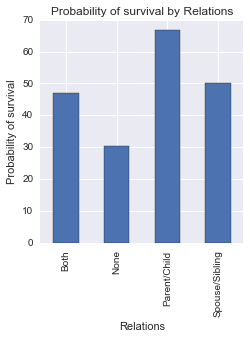

In [574]:
#Draw the bar graph for survived based on relations
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
temp2.plot(kind = 'bar')
ax1.set_xlabel('Relations')
ax1.set_ylabel('Probability of survival')
ax1.set_title("Probability of survival by Relations")

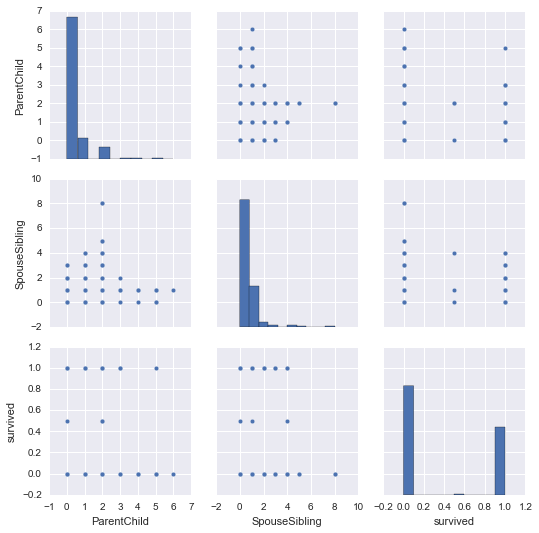

In [575]:
sns.pairplot(df_relatives);

In [576]:
#Check if there is any corelaton between boat, body and survived. If too many nulls then drop these features
#df_bb = df1[['boat', 'body', 'survived']]


# In order of significance the features are -
#Gender, Age, Class, Cabin, embarkedPort, Relations

In [577]:
#Create column for relationsip ; this can have values - 'Parent/Child', 'Spouse/Sibling', 'Both'
#, 'None'
#Create function to derive these values
def findRelations(row):
    if (row.parch > 0 and row.sibsp == 0):
            output = 'Parent/Child'
    elif (row.parch > 0 and row.sibsp > 0):
            output = 'Both'
    elif (row.parch == 0 and row.sibsp > 0):
            output = 'Spouse/Sibling'
    else:
            output = 'None'

    return output



In [578]:
#Create final dataframe
df1['relations'] = df1.apply(lambda row: findRelations(row), axis=1)
df2 = df1[['pclass', 'sex', 'age', 'CabinID', 'embarkedPort', 'relations','survived']]
df3 = df2[['pclass', 'sex', 'age', 'embarkedPort', 'relations']]
df3

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,pclass,sex,age,embarkedPort,relations
0,3,male,22.0,Southampton,Spouse/Sibling
1,1,female,38.0,Cherbourg,Spouse/Sibling
2,3,female,26.0,Southampton,None
3,1,female,35.0,Southampton,Spouse/Sibling
4,3,male,35.0,Southampton,None
5,3,male,29.0,Queenstown,None
6,1,male,54.0,Southampton,None
7,3,male,2.0,Southampton,Both
8,3,female,27.0,Southampton,Parent/Child
9,2,female,14.0,Cherbourg,Spouse/Sibling


In [579]:
#Final check - draw a pivot and bar graph
temp2 = df1.pivot_table(values='survived',
    index=['pclass', 'sex', 'age', 'CabinID', 'embarkedPort', 'relations'],aggfunc=lambda x: x.mean())

print ('\nProbility of survival :') 
print (temp2)


Probility of survival :
pclass  sex     age   CabinID  embarkedPort  relations     
1       female  2.0   C        Southampton   Both              0.000000
                14.0  B        Southampton   Both              1.000000
                15.0  B        Southampton   Parent/Child      1.000000
                16.0  B        Cherbourg     Parent/Child      1.000000
                               Southampton   None              1.000000
                      D        Southampton   Parent/Child      1.000000
                17.0  B        Southampton   Spouse/Sibling    1.000000
                      C        Cherbourg     Spouse/Sibling    1.000000
                18.0  B        Cherbourg     Both              1.000000
                      C        Cherbourg     Spouse/Sibling    1.000000
                      E        Southampton   Parent/Child      1.000000
                19.0  B        Cherbourg     Spouse/Sibling    1.000000
                               Southampton   None  

# Apply machine learning algos

In [580]:
#Convert all data types to numeric for SCikit

from sklearn.preprocessing import LabelEncoder
var_mod = ['pclass', 'sex', 'age', 'CabinID', 'embarkedPort', 'relations','survived']
le = LabelEncoder()
for i in var_mod:
    df2[i] = le.fit_transform(df2[i])
df2.dtypes


/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


pclass          int64
sex             int64
age             int64
CabinID         int64
embarkedPort    int64
relations       int64
survived        int64
dtype: object

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


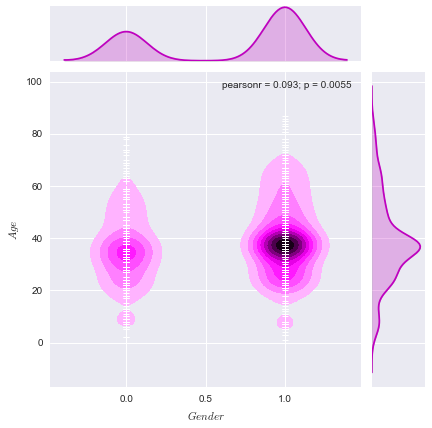

In [581]:
#KDE Jointplot/ Jointgrid for sex and age
g = sns.jointplot(x="sex", y="age", data=df2, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Gender$", "$Age$");

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


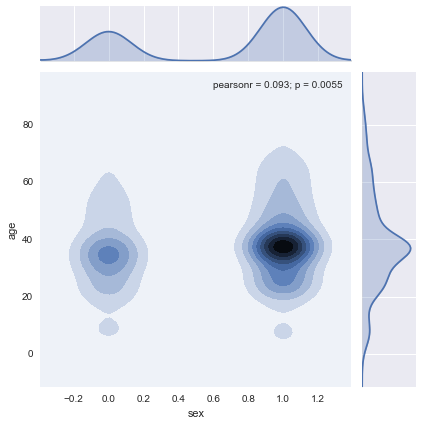

In [582]:
sns.jointplot(x="sex", y="age", data=df2, kind="kde");

In [583]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn import linear_model

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

# Logistic Regression

In [584]:
#Generate Logistic Regession model
outcome_var = 'survived' 
model = LogisticRegression() 
predictor_var = ['pclass', 'sex', 'age',  'embarkedPort', 'relations'] 
classification_model(model, df2, predictor_var, outcome_var)

Accuracy : 79.237%
Cross-Validation Score : 78.564%


In [585]:
outcome_var = 'survived'
model = LogisticRegression()
predictor_var = ['pclass', 'sex', 'age']
classification_model(model, df2, predictor_var, outcome_var)

Accuracy : 79.461%
Cross-Validation Score : 79.011%


In [586]:
outcome_var = 'survived'
model = LogisticRegression()
predictor_var = ['sex', 'age']
classification_model(model, df2, predictor_var, outcome_var)

Accuracy : 78.676%
Cross-Validation Score : 78.672%


# SVM MODEL

In [587]:
#Generate SVM model
from sklearn import svm
#Create SVM classification object
model = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape=None, degree=3, gamma='auto', kernel='rbf', max_iter=-1, probability=False, random_state=10, shrinking=True, tol=0.001, verbose=False) 
predictor_var = ['pclass', 'sex', 'age', 'embarkedPort', 'relations'] 
outcome_var = 'survived' 
classification_model(model, df2, predictor_var, outcome_var)


Accuracy : 89.787%
Cross-Validation Score : 78.232%


# RANDOM FOREST MODEL

In [588]:
# Generate SVM model
from sklearn import svm
# Create SVM classification object 
model = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=10, shrinking=True,
    tol=0.001, verbose=False) 
predictor_var = ['sex', 'age']
outcome_var = 'survived'
classification_model(model, df2, predictor_var, outcome_var)

Accuracy : 83.389%
Cross-Validation Score : 77.665%


In [589]:
#Generate Random Forest model
#model = RandomForestClassifier(n_estimators = 100)
model = RandomForestClassifier(n_estimators =500,  oob_score = "TRUE", n_jobs = -1,
    random_state =10, max_features = "sqrt", min_samples_split = 20, min_samples_leaf = 20)
outcome_var = 'survived'
predictor_var = ['pclass', 'sex', 'age',  'embarkedPort', 'relations'] 
classification_model(model, df2, predictor_var,outcome_var)

Accuracy : 81.818%
Cross-Validation Score : 80.583%


# Tune Random Forest model

In [590]:
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

response = 'survived'
IDcol = 'ID'
CabinID = 'CabinID'

In [591]:
#define a function which will help us create RF models and perform cross-validation.

def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
  
    dtrain['survived'] = label_binarize(dtrain['survived'], classes=[0, 1, 2])
    alg.fit(dtrain[predictors], dtrain['survived'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['survived'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['survived'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['survived'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Model Report
Accuracy : 0.8182
AUC Score (Train): 0.893376
CV Score : Mean - 0.8758254 | Std - 0.02920349 | Min - 0.8165775 | Max - 0.9171123


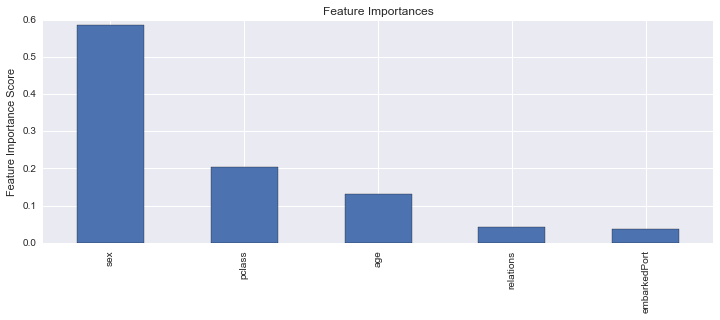

In [592]:
#Create baseline model with RF model
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
rfm0 = RandomForestClassifier(n_estimators =500,  oob_score = "TRUE", n_jobs = -1,
    random_state =10, max_features = "sqrt", min_samples_split = 20, min_samples_leaf = 20)
modelfit(rfm0, df2, predictors)

In [593]:
#Use Grid Search for tuning the RF model
#Choose the optimum n_estimators and learning rate

#Choose all predictors except target & IDcols
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test1 = {'n_estimators':[20,30,40,50,60,70,80, 90, 100]}

gsearch1 = GridSearchCV(estimator = RandomForestClassifier(n_estimators =500,  oob_score = "TRUE", n_jobs = -1,
    random_state =10, max_features = "sqrt", max_depth = 8, min_samples_split = 20, min_samples_leaf = 20), 
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
    
gsearch1.fit(df2[predictors],df2[response])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



([mean: 0.87051, std: 0.01877, params: {'n_estimators': 20},
  mean: 0.87026, std: 0.01754, params: {'n_estimators': 30},
  mean: 0.87057, std: 0.01737, params: {'n_estimators': 40},
  mean: 0.87024, std: 0.01896, params: {'n_estimators': 50},
  mean: 0.87026, std: 0.01780, params: {'n_estimators': 60},
  mean: 0.86894, std: 0.02007, params: {'n_estimators': 70},
  mean: 0.86996, std: 0.01881, params: {'n_estimators': 80},
  mean: 0.87003, std: 0.01969, params: {'n_estimators': 90},
  mean: 0.87021, std: 0.01857, params: {'n_estimators': 100}],
 {'n_estimators': 40},
 0.87057359713657367)

In [594]:
#Find optimum min_sample_split and max_depth
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test2 = {'max_depth':[5,6,7,8,9,10,11], 'min_samples_split': [10,20,30,40,50,60,70]}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators =40,  oob_score = "TRUE", n_jobs = -1,
    random_state =10, max_features = "sqrt", max_depth = 8, min_samples_split = 20, min_samples_leaf = 20), 
                        param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(df2[predictors],df2[response])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.86966, std: 0.01858, params: {'max_depth': 5, 'min_samples_split': 10},
  mean: 0.86966, std: 0.01858, params: {'max_depth': 5, 'min_samples_split': 20},
  mean: 0.86966, std: 0.01858, params: {'max_depth': 5, 'min_samples_split': 30},
  mean: 0.86966, std: 0.01858, params: {'max_depth': 5, 'min_samples_split': 40},
  mean: 0.86904, std: 0.01695, params: {'max_depth': 5, 'min_samples_split': 50},
  mean: 0.86633, std: 0.01725, params: {'max_depth': 5, 'min_samples_split': 60},
  mean: 0.86620, std: 0.01762, params: {'max_depth': 5, 'min_samples_split': 70},
  mean: 0.87023, std: 0.01707, params: {'max_depth': 6, 'min_samples_split': 10},
  mean: 0.87023, std: 0.01707, params: {'max_depth': 6, 'min_samples_split': 20},
  mean: 0.87023, std: 0.01707, params: {'max_depth': 6, 'min_samples_split': 30},
  mean: 0.87023, std: 0.01707, params: {'max_depth': 6, 'min_samples_split': 40},
  mean: 0.86966, std: 0.01709, params: {'max_depth': 6, 'min_samples_split': 50},
  mean: 0.86695,

In [595]:
#Check optimum min_sample_leaf for a range min_sample_split
param_test3 = {'min_samples_split':[10,20,30,40,50,60,70], 'min_samples_leaf': [5,10,15,20,25,30,35,40]}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators =40,  oob_score = "TRUE", n_jobs = -1,
    random_state =10, max_features = "sqrt", max_depth = 9, min_samples_split = 10, min_samples_leaf = 20), 
                        param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(df2[predictors],df2[response])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.88145, std: 0.03592, params: {'min_samples_split': 10, 'min_samples_leaf': 5},
  mean: 0.88236, std: 0.03418, params: {'min_samples_split': 20, 'min_samples_leaf': 5},
  mean: 0.87822, std: 0.03389, params: {'min_samples_split': 30, 'min_samples_leaf': 5},
  mean: 0.87426, std: 0.03039, params: {'min_samples_split': 40, 'min_samples_leaf': 5},
  mean: 0.87860, std: 0.02795, params: {'min_samples_split': 50, 'min_samples_leaf': 5},
  mean: 0.87321, std: 0.02622, params: {'min_samples_split': 60, 'min_samples_leaf': 5},
  mean: 0.87483, std: 0.02614, params: {'min_samples_split': 70, 'min_samples_leaf': 5},
  mean: 0.87657, std: 0.02644, params: {'min_samples_split': 10, 'min_samples_leaf': 10},
  mean: 0.87657, std: 0.02644, params: {'min_samples_split': 20, 'min_samples_leaf': 10},
  mean: 0.87615, std: 0.02795, params: {'min_samples_split': 30, 'min_samples_leaf': 10},
  mean: 0.87501, std: 0.02409, params: {'min_samples_split': 40, 'min_samples_leaf': 10},
  mean: 0.87915, 

In [596]:
#Tune max_feature
param_test4 = {'max_features': [2,3,4,5]}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators =40,  oob_score = "TRUE", n_jobs = -1,
    random_state =10, max_features = "sqrt", max_depth = 9, min_samples_split = 20, min_samples_leaf = 5), 
                        param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(df2[predictors],df2[response])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_



([mean: 0.88236, std: 0.03418, params: {'max_features': 2},
  mean: 0.88493, std: 0.03247, params: {'max_features': 3},
  mean: 0.88753, std: 0.03136, params: {'max_features': 4},
  mean: 0.88672, std: 0.02901, params: {'max_features': 5}],
 {'max_features': 4},
 0.8875276356327062)

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Model Report
Accuracy : 0.8586
AUC Score (Train): 0.935848
CV Score : Mean - 0.8833588 | Std - 0.0516318 | Min - 0.7796791 | Max - 0.9574866


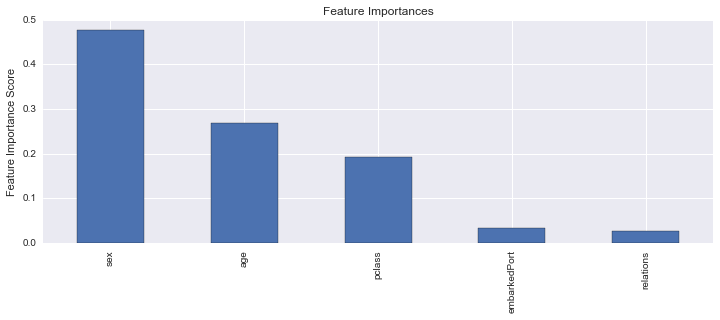

In [597]:
#Calibrate with RF 
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
rfm0 = RandomForestClassifier(n_estimators =40,  oob_score = "TRUE", n_jobs = -1,
    random_state =10, max_features = 4, max_depth = 9, min_samples_split = 20, min_samples_leaf = 5)
modelfit(rfm0, df2, predictors)

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Model Report
Accuracy : 0.8608
AUC Score (Train): 0.936818
CV Score : Mean - 0.8903963 | Std - 0.04502431 | Min - 0.8090909 | Max - 0.9574866


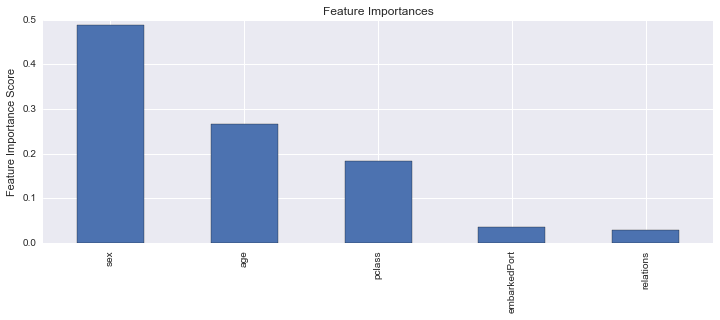

In [598]:
# Check for different n_estimators
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
rfm0 = RandomForestClassifier(n_estimators =250,  oob_score = "TRUE", n_jobs = -1,
    random_state =10, max_features = 4, max_depth = 9, min_samples_split = 20, min_samples_leaf = 5)
modelfit(rfm0, df2, predictors)

# NAIVE BAYES MODEL

In [599]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
outcome_var = 'survived'
predictor_var = ['pclass', 'sex', 'age',  'embarkedPort', 'relations'] 
classification_model(model, df2, predictor_var,outcome_var)

Accuracy : 77.217%
Cross-Validation Score : 76.771%


# Decision Tree model

In [600]:
from sklearn import tree
# Create tree object 
model = tree.DecisionTreeClassifier(criterion='gini')
outcome_var = 'survived'
predictor_var = ['pclass', 'sex', 'age',  'embarkedPort', 'relations'] 
classification_model(model, df2, predictor_var,outcome_var)

Accuracy : 94.276%
Cross-Validation Score : 79.691%


# Gradient Boosting 

In [601]:
#Generate Gradient Boosting ensembling model
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto')
outcome_var = 'survived'
predictor_var = ['pclass', 'sex', 'age',  'embarkedPort', 'relations'] 
classification_model(model, df2, predictor_var,outcome_var)

Accuracy : 88.552%
Cross-Validation Score : 82.833%


# Tuning GBM

In [602]:
#Add column name to the index in the Dataframe
df2.index.name = 'ID'




In [603]:
#Convert all data types to numeric for SCikit

from sklearn.preprocessing import LabelEncoder
var_mod = ['pclass', 'sex', 'age',  'embarkedPort', 'relations', 'survived']
le = LabelEncoder()
for i in var_mod:
    df2[i] = le.fit_transform(df1[i])
df2.dtypes 



/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


pclass          int64
sex             int64
age             int64
CabinID         int64
embarkedPort    int64
relations       int64
survived        int64
dtype: object

In [660]:
#Import the libraries
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

response = 'survived'
IDcol = 'ID'
CabinID = 'CabinID'

In [661]:
#define a function which will help us create GBM models and perform cross-validation.

def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=10):
    #Fit the algorithm on the data
  
    dtrain['survived'] = label_binarize(dtrain['survived'], classes=[0, 1, 2])
    alg.fit(dtrain[predictors], dtrain['survived'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['survived'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['survived'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['survived'], dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Model Report
Accuracy : 0.8855
AUC Score (Train): 0.943704
CV Score : Mean - 0.8962264 | Std - 0.03616947 | Min - 0.8229947 | Max - 0.9553476


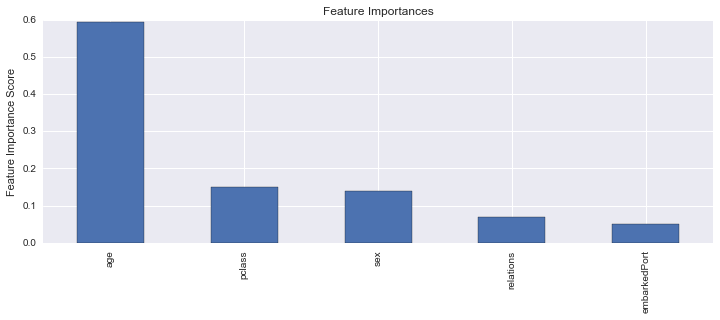

In [662]:
#Create baseline model with GBM
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, df2, predictors)

In [607]:
#Choose the optimum n_estimators and learning rate

#Choose all predictors except target & IDcols
predictors = [x for x in df2.columns if x not in [response, IDcol]]
param_test1 = {'n_estimators':[20,30,40,50,60,70,80, 90, 100]}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=20,min_samples_leaf=20,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5) 
    
gsearch1.fit(df2[predictors],df2[response])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_



([mean: 0.88692, std: 0.02857, params: {'n_estimators': 20},
  mean: 0.89094, std: 0.03118, params: {'n_estimators': 30},
  mean: 0.88813, std: 0.03250, params: {'n_estimators': 40},
  mean: 0.88923, std: 0.03107, params: {'n_estimators': 50},
  mean: 0.88830, std: 0.03246, params: {'n_estimators': 60},
  mean: 0.88749, std: 0.03391, params: {'n_estimators': 70},
  mean: 0.88740, std: 0.03405, params: {'n_estimators': 80},
  mean: 0.88601, std: 0.03469, params: {'n_estimators': 90},
  mean: 0.88486, std: 0.03566, params: {'n_estimators': 100}],
 {'n_estimators': 30},
 0.89094414960748058)

In [608]:
#Choose the optimum n_estimators and learning rate

#Choose all predictors except target & IDcols
predictors = [x for x in df2.columns if x not in [response, IDcol]]
param_test1 = {'n_estimators':[20,30,40,50,60,70,80, 90, 100]}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, min_samples_split=20,min_samples_leaf=20,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5) 
    
gsearch1.fit(df2[predictors],df2[response])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_





([mean: 0.88099, std: 0.02676, params: {'n_estimators': 20},
  mean: 0.88388, std: 0.02746, params: {'n_estimators': 30},
  mean: 0.88402, std: 0.02774, params: {'n_estimators': 40},
  mean: 0.88732, std: 0.02886, params: {'n_estimators': 50},
  mean: 0.88823, std: 0.03004, params: {'n_estimators': 60},
  mean: 0.88675, std: 0.03134, params: {'n_estimators': 70},
  mean: 0.88719, std: 0.03091, params: {'n_estimators': 80},
  mean: 0.88593, std: 0.03340, params: {'n_estimators': 90},
  mean: 0.88672, std: 0.03313, params: {'n_estimators': 100}],
 {'n_estimators': 60},
 0.88823259934571797)

In [609]:
#Tune n_estimator further with smaller increments

#Choose all predictors except target & IDcols
predictors = [x for x in df2.columns if x not in [response, IDcol]]
param_test1 = {'n_estimators':[40,45,50,55,60,65,70,75,80]}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, min_samples_split=20,min_samples_leaf=20,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5) 
    
gsearch1.fit(df2[predictors],df2[response])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.88402, std: 0.02774, params: {'n_estimators': 40},
  mean: 0.88538, std: 0.02969, params: {'n_estimators': 45},
  mean: 0.88732, std: 0.02886, params: {'n_estimators': 50},
  mean: 0.88689, std: 0.02953, params: {'n_estimators': 55},
  mean: 0.88823, std: 0.03004, params: {'n_estimators': 60},
  mean: 0.88632, std: 0.03155, params: {'n_estimators': 65},
  mean: 0.88675, std: 0.03134, params: {'n_estimators': 70},
  mean: 0.88740, std: 0.03129, params: {'n_estimators': 75},
  mean: 0.88719, std: 0.03091, params: {'n_estimators': 80}],
 {'n_estimators': 60},
 0.88823259934571797)

In [610]:
#Find optimum min_sample_split and max_depth
predictors = [x for x in df2.columns if x not in [response, IDcol]]
param_test2 = {'max_depth':[5,10,2], 'min_samples_split': [20,60,20]}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(df2[predictors],df2[response])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.88275, std: 0.03203, params: {'max_depth': 5, 'min_samples_split': 20},
  mean: 0.88183, std: 0.02965, params: {'max_depth': 5, 'min_samples_split': 60},
  mean: 0.88275, std: 0.03203, params: {'max_depth': 5, 'min_samples_split': 20},
  mean: 0.88003, std: 0.03431, params: {'max_depth': 10, 'min_samples_split': 20},
  mean: 0.88356, std: 0.03630, params: {'max_depth': 10, 'min_samples_split': 60},
  mean: 0.88003, std: 0.03431, params: {'max_depth': 10, 'min_samples_split': 20},
  mean: 0.87456, std: 0.01952, params: {'max_depth': 2, 'min_samples_split': 20},
  mean: 0.87498, std: 0.01805, params: {'max_depth': 2, 'min_samples_split': 60},
  mean: 0.87456, std: 0.01952, params: {'max_depth': 2, 'min_samples_split': 20}],
 {'max_depth': 10, 'min_samples_split': 60},
 0.88356343948175053)

In [611]:
#Tune max_depth and min_sample_splits further
predictors = [x for x in df2.columns if x not in [response, IDcol]]
param_test2 = {'max_depth':[5,10,15,20], 'min_samples_split': [50,55,60,65,70]}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(df2[predictors],df2[response])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.87842, std: 0.03269, params: {'max_depth': 5, 'min_samples_split': 50},
  mean: 0.88115, std: 0.02961, params: {'max_depth': 5, 'min_samples_split': 55},
  mean: 0.88183, std: 0.02965, params: {'max_depth': 5, 'min_samples_split': 60},
  mean: 0.88363, std: 0.02773, params: {'max_depth': 5, 'min_samples_split': 65},
  mean: 0.88070, std: 0.02836, params: {'max_depth': 5, 'min_samples_split': 70},
  mean: 0.88291, std: 0.03909, params: {'max_depth': 10, 'min_samples_split': 50},
  mean: 0.88294, std: 0.03912, params: {'max_depth': 10, 'min_samples_split': 55},
  mean: 0.88356, std: 0.03630, params: {'max_depth': 10, 'min_samples_split': 60},
  mean: 0.88564, std: 0.03572, params: {'max_depth': 10, 'min_samples_split': 65},
  mean: 0.88217, std: 0.03605, params: {'max_depth': 10, 'min_samples_split': 70},
  mean: 0.88159, std: 0.03949, params: {'max_depth': 15, 'min_samples_split': 50},
  mean: 0.88214, std: 0.03548, params: {'max_depth': 15, 'min_samples_split': 55},
  mean: 0

In [612]:
#Check optimum min_sample_leaf for a range min_sample_split
param_test3 = {'min_samples_split':[50,55,60,65,70,75], 'min_samples_leaf': [5,10,15,20,25]}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=60,max_depth=10,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(df2[predictors],df2[response])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.88580, std: 0.03711, params: {'min_samples_split': 50, 'min_samples_leaf': 5},
  mean: 0.88381, std: 0.03654, params: {'min_samples_split': 55, 'min_samples_leaf': 5},
  mean: 0.88138, std: 0.03677, params: {'min_samples_split': 60, 'min_samples_leaf': 5},
  mean: 0.88448, std: 0.03396, params: {'min_samples_split': 65, 'min_samples_leaf': 5},
  mean: 0.88486, std: 0.03498, params: {'min_samples_split': 70, 'min_samples_leaf': 5},
  mean: 0.88274, std: 0.03479, params: {'min_samples_split': 75, 'min_samples_leaf': 5},
  mean: 0.88441, std: 0.03373, params: {'min_samples_split': 50, 'min_samples_leaf': 10},
  mean: 0.88554, std: 0.03499, params: {'min_samples_split': 55, 'min_samples_leaf': 10},
  mean: 0.88457, std: 0.03430, params: {'min_samples_split': 60, 'min_samples_leaf': 10},
  mean: 0.88502, std: 0.03382, params: {'min_samples_split': 65, 'min_samples_leaf': 10},
  mean: 0.88547, std: 0.03301, params: {'min_samples_split': 70, 'min_samples_leaf': 10},
  mean: 0.88431,

In [613]:
#Tune max_feature
param_test4 = {'max_features': [2,3,4,5]}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=60,max_depth=10, min_samples_split=70, min_samples_leaf=20, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(df2[predictors],df2[response])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_



([mean: 0.88834, std: 0.02716, params: {'max_features': 2},
  mean: 0.88516, std: 0.03172, params: {'max_features': 3},
  mean: 0.88675, std: 0.03194, params: {'max_features': 4},
  mean: 0.88975, std: 0.02992, params: {'max_features': 5}],
 {'max_features': 5},
 0.88974816503096155)

In [614]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=100,max_depth=2,min_samples_split=20, min_samples_leaf=15, random_state=10,max_features=5),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(df2[predictors],df2[response])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.88791, std: 0.02323, params: {'subsample': 0.6},
  mean: 0.88600, std: 0.02391, params: {'subsample': 0.7},
  mean: 0.88599, std: 0.02290, params: {'subsample': 0.75},
  mean: 0.88575, std: 0.02270, params: {'subsample': 0.8},
  mean: 0.88464, std: 0.02386, params: {'subsample': 0.85},
  mean: 0.88411, std: 0.02312, params: {'subsample': 0.9}],
 {'subsample': 0.6},
 0.8879127231630225)

In [615]:
# The optimum parameters -
#Learnng Rate = 0.05
#n_estimators = 80
#max_depth = 2
#min_samples_split = 60
#min_samples_leaf = 15
#max_featues = 4
#sub sample = 0.75

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Model Report
Accuracy : 0.8642
AUC Score (Train): 0.923923
CV Score : Mean - 0.8921972 | Std - 0.03892076 | Min - 0.8026738 | Max - 0.9532086


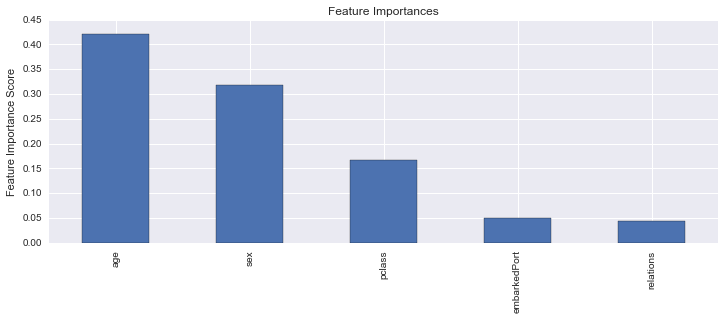

In [663]:
#Check model score
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
gbm0 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=60,max_depth=10,min_samples_split=70, min_samples_leaf=20, subsample=0.6, random_state=10, max_features=5)
                                   
modelfit(gbm0, df2, predictors)

# Optimize learning_rate and n_estimators


/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Model Report
Accuracy : 0.8844
AUC Score (Train): 0.939523
CV Score : Mean - 0.8968394 | Std - 0.03816177 | Min - 0.8171123 | Max - 0.9526738


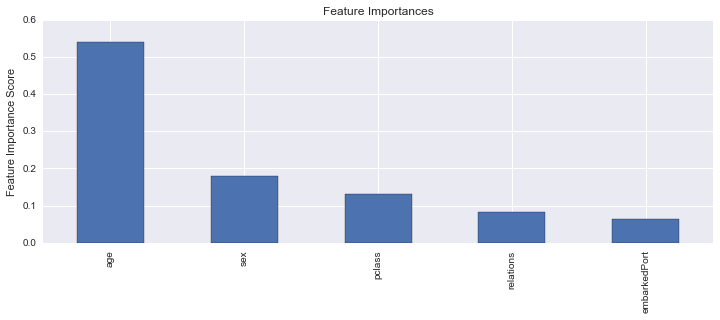

In [666]:
#Check model score
#Increase the n_estimators to 500
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
gbm0 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=690,max_depth=10,min_samples_split=70, min_samples_leaf=20, subsample=0.6, random_state=10, max_features=5)
                                   
modelfit(gbm0, df2, predictors)

In [618]:
# Final parameters
#n_estimator = 700
#learning_rate = 0.01
#min_sample_split = 70
#max_depth =10
#min_sample_leaf = 20
#max_features = 5
#sub sample = 0.6

# Xtream Gradient Boosting / XGB

In [619]:
#Import libraries:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

response = 'survived'
IDcol = 'ID'
CabinID = 'CabinID'


In [620]:
#Define a function which will help us create XGBoost models and perform cross-validation.

def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=10, early_stopping_rounds=20):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain['survived'].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['survived'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['survived'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['survived'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['survived'], dtrain_predprob))
    print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))          
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [621]:
#Consider first round estimates of the paarmeters as follows -
#learning_rate = 0.1
#n_estimators = 100
#max_depth = 5
#min_child_weight = 1
#gamma = 0
#subsample, colsample_bytree = 0.8
#scale_pos_weight = 1  #greater than 0 for high class imbalance


Model Report
Accuracy : 0.8866
AUC Score (Train): 0.944279
CV Score : Mean - 0.8966298 | Std - 0.0358353 | Min - 0.8262032 | Max - 0.9558824


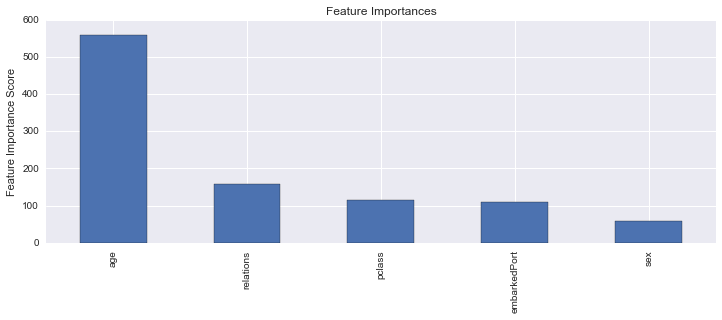

In [622]:
#Choose all predictors except target & IDcols
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 silent = 0,
 seed=10)
modelfit(xgb1, df2, predictors)

In [623]:
#Find optimum n_estimators for learning_rate = 0.1

predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test0 = {'n_estimators':[20,30,40,50,60,70,80, 90, 100, 110,120,130,140,150]}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test0, scoring='roc_auc', iid=False, cv=5)
gsearch1.fit(df2[predictors],df2[response])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.89413, std: 0.02839, params: {'n_estimators': 20},
  mean: 0.89398, std: 0.03098, params: {'n_estimators': 30},
  mean: 0.89389, std: 0.02884, params: {'n_estimators': 40},
  mean: 0.89115, std: 0.03011, params: {'n_estimators': 50},
  mean: 0.88954, std: 0.03133, params: {'n_estimators': 60},
  mean: 0.88940, std: 0.03157, params: {'n_estimators': 70},
  mean: 0.88849, std: 0.03232, params: {'n_estimators': 80},
  mean: 0.88793, std: 0.03025, params: {'n_estimators': 90},
  mean: 0.88865, std: 0.03086, params: {'n_estimators': 100},
  mean: 0.88888, std: 0.03070, params: {'n_estimators': 110},
  mean: 0.88843, std: 0.03103, params: {'n_estimators': 120},
  mean: 0.88727, std: 0.03122, params: {'n_estimators': 130},
  mean: 0.88618, std: 0.03148, params: {'n_estimators': 140},
  mean: 0.88618, std: 0.03162, params: {'n_estimators': 150}],
 {'n_estimators': 20},
 0.89413237409406943)

In [624]:
#Further fine tune n_estimators
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test0 = {'n_estimators':[20,25,30,35,40]}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=80, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test0, scoring='roc_auc', iid=False, cv=5)
gsearch1.fit(df2[predictors],df2[response])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.89413, std: 0.02839, params: {'n_estimators': 20},
  mean: 0.89464, std: 0.03095, params: {'n_estimators': 25},
  mean: 0.89398, std: 0.03098, params: {'n_estimators': 30},
  mean: 0.89362, std: 0.02918, params: {'n_estimators': 35},
  mean: 0.89389, std: 0.02884, params: {'n_estimators': 40}],
 {'n_estimators': 25},
 0.89463535434117802)

In [625]:
#Tune nax_depth ad min_child_weight with n_estimators = 30
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test1 = {'max_depth':[20,60,20], 'min_child_weight': [5,15,5]}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=30, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc', iid=False, cv=5)
gsearch1.fit(df2[predictors],df2[response])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.88571, std: 0.02902, params: {'max_depth': 20, 'min_child_weight': 5},
  mean: 0.86424, std: 0.01524, params: {'max_depth': 20, 'min_child_weight': 15},
  mean: 0.88571, std: 0.02902, params: {'max_depth': 20, 'min_child_weight': 5},
  mean: 0.88571, std: 0.02902, params: {'max_depth': 60, 'min_child_weight': 5},
  mean: 0.86424, std: 0.01524, params: {'max_depth': 60, 'min_child_weight': 15},
  mean: 0.88571, std: 0.02902, params: {'max_depth': 60, 'min_child_weight': 5},
  mean: 0.88571, std: 0.02902, params: {'max_depth': 20, 'min_child_weight': 5},
  mean: 0.86424, std: 0.01524, params: {'max_depth': 20, 'min_child_weight': 15},
  mean: 0.88571, std: 0.02902, params: {'max_depth': 20, 'min_child_weight': 5}],
 {'max_depth': 20, 'min_child_weight': 5},
 0.88571303025325887)

In [626]:
#Check max_depth and min_child_weight a little further
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
param_test1 = {'max_depth':[10,15,20,25,30,35], 'min_child_weight': [4,5,6]}

gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=30, max_depth=20,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc', iid=False, cv=5)
gsearch1.fit(df2[predictors],df2[response])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.89003, std: 0.03071, params: {'max_depth': 10, 'min_child_weight': 4},
  mean: 0.88571, std: 0.02902, params: {'max_depth': 10, 'min_child_weight': 5},
  mean: 0.88348, std: 0.02395, params: {'max_depth': 10, 'min_child_weight': 6},
  mean: 0.89003, std: 0.03071, params: {'max_depth': 15, 'min_child_weight': 4},
  mean: 0.88571, std: 0.02902, params: {'max_depth': 15, 'min_child_weight': 5},
  mean: 0.88348, std: 0.02395, params: {'max_depth': 15, 'min_child_weight': 6},
  mean: 0.89003, std: 0.03071, params: {'max_depth': 20, 'min_child_weight': 4},
  mean: 0.88571, std: 0.02902, params: {'max_depth': 20, 'min_child_weight': 5},
  mean: 0.88348, std: 0.02395, params: {'max_depth': 20, 'min_child_weight': 6},
  mean: 0.89003, std: 0.03071, params: {'max_depth': 25, 'min_child_weight': 4},
  mean: 0.88571, std: 0.02902, params: {'max_depth': 25, 'min_child_weight': 5},
  mean: 0.88348, std: 0.02395, params: {'max_depth': 25, 'min_child_weight': 6},
  mean: 0.89003, std: 0.0307

In [627]:
#Tune Gamma
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=30, max_depth=10,
 min_child_weight=4, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(df2[predictors],df2[response])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.89003, std: 0.03071, params: {'gamma': 0.0},
  mean: 0.88948, std: 0.03105, params: {'gamma': 0.1},
  mean: 0.88929, std: 0.03104, params: {'gamma': 0.2},
  mean: 0.89082, std: 0.03170, params: {'gamma': 0.3},
  mean: 0.89100, std: 0.03164, params: {'gamma': 0.4}],
 {'gamma': 0.4},
 0.89100056739525046)


Model Report
Accuracy : 0.8575
AUC Score (Train): 0.917109
CV Score : Mean - 0.8821989 | Std - 0.03963934 | Min - 0.7983957 | Max - 0.9316449


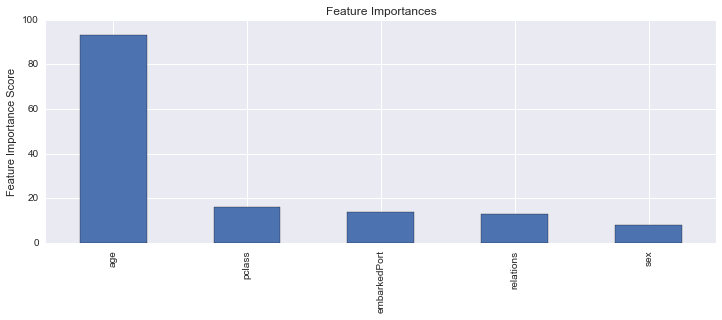

In [628]:
#Re calibrate the model with optimal values determined so far
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=30,
 max_depth=10,
 min_child_weight=4,
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 silent = 0,
 seed=10)
modelfit(xgb1, df2, predictors)

In [629]:
#Tune subsample and colsample_bytree
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=30, max_depth=10,
 min_child_weight=4, gamma=0.2, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(df2[predictors],df2[response])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.88665, std: 0.02419, params: {'subsample': 0.6, 'colsample_bytree': 0.6},
  mean: 0.88875, std: 0.02726, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.89236, std: 0.03016, params: {'subsample': 0.8, 'colsample_bytree': 0.6},
  mean: 0.89349, std: 0.02804, params: {'subsample': 0.9, 'colsample_bytree': 0.6},
  mean: 0.88665, std: 0.02419, params: {'subsample': 0.6, 'colsample_bytree': 0.7},
  mean: 0.88875, std: 0.02726, params: {'subsample': 0.7, 'colsample_bytree': 0.7},
  mean: 0.89236, std: 0.03016, params: {'subsample': 0.8, 'colsample_bytree': 0.7},
  mean: 0.89349, std: 0.02804, params: {'subsample': 0.9, 'colsample_bytree': 0.7},
  mean: 0.88756, std: 0.02509, params: {'subsample': 0.6, 'colsample_bytree': 0.8},
  mean: 0.88826, std: 0.02924, params: {'subsample': 0.7, 'colsample_bytree': 0.8},
  mean: 0.88929, std: 0.03104, params: {'subsample': 0.8, 'colsample_bytree': 0.8},
  mean: 0.88943, std: 0.03182, params: {'subsample': 0.9, 'colsample_bytree'

In [630]:
#Redetermine subsample and colsample_bytree further
param_test5 = {
 'subsample':[i/10.0 for i in range(7,8,9)],
 'colsample_bytree':[i/10.0 for i in range(6,8)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=30, max_depth=10,
 min_child_weight=4, gamma=0.2, subsample=0.7, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',iid=False, cv=5)
gsearch5.fit(df2[predictors],df2[response])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.88875, std: 0.02726, params: {'subsample': 0.7, 'colsample_bytree': 0.6},
  mean: 0.88875, std: 0.02726, params: {'subsample': 0.7, 'colsample_bytree': 0.7}],
 {'colsample_bytree': 0.6, 'subsample': 0.7},
 0.88874923831809272)

In [631]:
#Tune regularization parameters
#Alpha
param_test6 = {'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]}

gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=30, max_depth=10,
 min_child_weight=4, gamma=0.2, subsample=0.7, colsample_bytree=0.7,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',iid=False, cv=5)
gsearch6.fit(df2[predictors],df2[response])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.88875, std: 0.02726, params: {'reg_alpha': 1e-05},
  mean: 0.88859, std: 0.02707, params: {'reg_alpha': 0.01},
  mean: 0.88852, std: 0.02675, params: {'reg_alpha': 0.1},
  mean: 0.88678, std: 0.02588, params: {'reg_alpha': 1},
  mean: 0.77851, std: 0.02937, params: {'reg_alpha': 100}],
 {'reg_alpha': 1e-05},
 0.88874923831809272)

In [632]:
#Re tune reg_alpha
param_test6 = {'reg_alpha':[0.005, 0.008, 0.01, 0.02,0.05]}

gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=30, max_depth=10,
 min_child_weight=4, gamma=0.2, subsample=0.7, colsample_bytree=0.6,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',iid=False, cv=5)
gsearch6.fit(df2[predictors],df2[response])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.88883, std: 0.02708, params: {'reg_alpha': 0.005},
  mean: 0.88854, std: 0.02726, params: {'reg_alpha': 0.008},
  mean: 0.88859, std: 0.02707, params: {'reg_alpha': 0.01},
  mean: 0.88853, std: 0.02688, params: {'reg_alpha': 0.02},
  mean: 0.88897, std: 0.02650, params: {'reg_alpha': 0.05}],
 {'reg_alpha': 0.05},
 0.88897157833289597)

In [633]:
#Tune regularization parameters
#Tune reg-lambda
param_test6 = {'reg_lambda':[0.0008, 0.0009, 0.001, 0.002, 0.003]}

gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=30, max_depth=10,
 min_child_weight=4, gamma=0.2, subsample=0.7, colsample_bytree=0.6,
 objective= 'binary:logistic', reg_alpha = 0.005, nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',iid=False, cv=5)
gsearch6.fit(df2[predictors],df2[response])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.89003, std: 0.02805, params: {'reg_lambda': 0.0008},
  mean: 0.89003, std: 0.02805, params: {'reg_lambda': 0.0009},
  mean: 0.89003, std: 0.02805, params: {'reg_lambda': 0.001},
  mean: 0.89003, std: 0.02805, params: {'reg_lambda': 0.002},
  mean: 0.89003, std: 0.02805, params: {'reg_lambda': 0.003}],
 {'reg_lambda': 0.0008},
 0.89002652288387518)

In [634]:
#Further tune the lambda
param_test6 = {'reg_lambda':[0.002, 0.003, 0.004]}

gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=30, max_depth=10,
 min_child_weight=4, gamma=0.2, subsample=0.7, colsample_bytree=0.6,
 objective= 'binary:logistic', reg_alpha = 0.005, nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',iid=False, cv=5)
gsearch6.fit(df2[predictors],df2[response])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

([mean: 0.89003, std: 0.02805, params: {'reg_lambda': 0.002},
  mean: 0.89003, std: 0.02805, params: {'reg_lambda': 0.003},
  mean: 0.88995, std: 0.02792, params: {'reg_lambda': 0.004}],
 {'reg_lambda': 0.002},
 0.89002652288387518)


Model Report
Accuracy : 0.8664
AUC Score (Train): 0.917924
CV Score : Mean - 0.8949082 | Std - 0.04419793 | Min - 0.7893048 | Max - 0.9524064


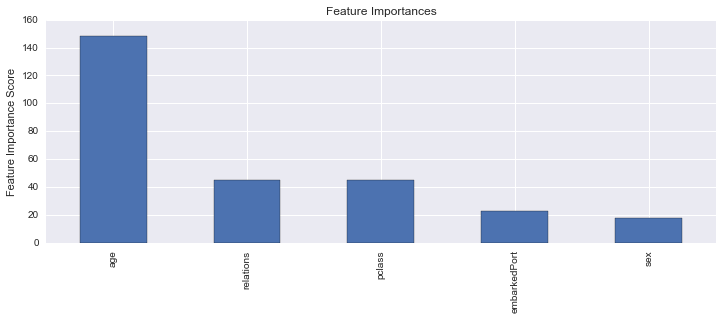

In [635]:
#Re calibrate the model
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=30,
 max_depth=10,
 min_child_weight=4,
 gamma=0.2,
 subsample=0.7,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 silent = 0,
 #reg_alpha = 0.002,
 #reg_lambda = 0.003,
 seed=10)
modelfit(xgb1, df2, predictors)

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Model Report
Accuracy : 0.8732
AUC Score (Train): 0.931169
CV Score : Mean - 0.900399 | Std - 0.03962874 | Min - 0.813369 | Max - 0.9574866


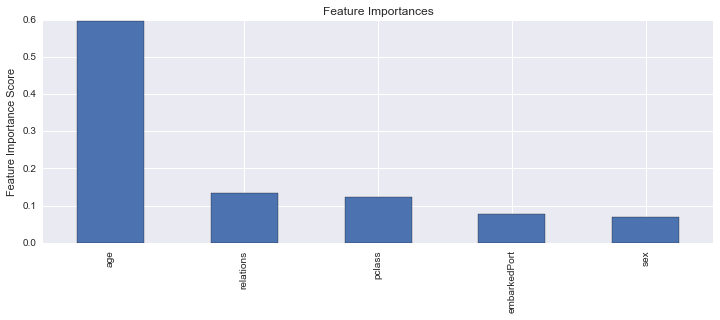

In [668]:
#Do some permu combi with learning rate and n_estimators and track the scores
predictors = [x for x in df2.columns if x not in [response, IDcol, CabinID]]
xgb1 = XGBClassifier(
 learning_rate =0.01,
 n_estimators=695,
 max_depth=10,
 min_child_weight=4,
 gamma=0.2,
 subsample=0.7,
 colsample_bytree=0.6,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 silent = 0,
 #reg_alpha = 1e-10,
 #reg_lambda = 0.002,
 seed=10)
modelfit(xgb1, df2, predictors)

In [669]:
#Extract the test data and standardize as per the model input data
df_test = pd.read_csv("/Users/suvojitdutta/Documents/PYTHON/Files/Titanic/kaggle_test.csv", encoding = "ISO-8859-1", error_bad_lines=False)
df_test1 = df_test[['pclass', 'sex', 'age', 'sibsp', 'parch', 'cabin', 'embarked']]
df_test1['embarkedPort'] = df_test1.embarked.apply(getEmbarkedLocation)
df_test1['relations'] = df_test1.apply(lambda row: findRelations(row), axis=1)
df_test1['CabinID'] = df_test1.cabin.apply(getCabinID)
df_test2 = df_test1[['pclass', 'sex', 'age', 'CabinID', 'embarkedPort', 'relations']]


/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

In [670]:
#Build null report on the test data
df_test.apply(num_missing, axis=0)

passengerId      0
pclass           0
name             0
sex              0
age             86
sibsp            0
parch            0
ticket           0
fare             1
cabin          327
embarked         0
dtype: int64

In [671]:
#Use boolean indexing to get the male age mean, median, mode
df_test_male = df_test.loc[(df_test["sex"]=='male')]
df_test_male.shape

(266, 11)

In [672]:
df_test_male.age.mean()

30.27273170731707

In [673]:
male_median_age = df_test_male.age.median()

In [674]:
#Use boolean indexing to get the female age mean, median, mode
df_test_female = df_test.loc[(df_test["sex"]=='female')]
df_test_female.shape

(152, 11)

In [675]:
female_median_age = df_test_female.age.median()

In [676]:
#Use boolean indexing to filter the data with age = Null
df_test_null_age = df_test.loc[(df_test["age"].isnull())]
df_test_null_age.shape

(86, 11)

In [677]:
#Impute male with null age with male median age with not null ages
df_test_null_age_male = df_test_null_age[(df_test["sex"]=='male')]
df_test_null_age_male.shape

/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


(61, 11)

In [678]:
#Function to calculate null age for male and female with null ages
def fillNullAge_test(row):
#    x=float('nan')

    if math.isnan(row.age):
#    if row.age.isnull():
        if (row.sex in ['male']) :
            output = male_median_age
        else :
            output = female_median_age
    else:
        output = row.age

    return output



In [679]:
#Feed the dataframe df_test through the function above to impute null ages with male and female median ages
df_test['age'] = df_test.apply(lambda row: fillNullAge_test(row), axis=1)


In [680]:
#Now lets check cabin. Build the CabinID
df_test['CabinID'] = df_test.cabin.apply(getCabinID)


In [681]:
#Check relations data / impute relations data
df_test['relations'] = df_test.apply(lambda row: findRelations(row), axis=1)


In [682]:
df_test['embarkedPort'] = df_test.embarked.apply(getEmbarkedLocation)

In [683]:
df_test.apply(num_missing, axis=0)

passengerId       0
pclass            0
name              0
sex               0
age               0
sibsp             0
parch             0
ticket            0
fare              1
cabin           327
embarked          0
CabinID           0
relations         0
embarkedPort      0
dtype: int64

In [684]:
df_test.shape


(418, 14)

In [685]:
#Create df_test2
df_test2 = df_test[['pclass', 'sex', 'age',  'embarkedPort', 'relations']]


In [686]:
#Save the result in csv file
df_test2.to_csv("/Users/suvojitdutta/Documents/PYTHON/Files/Titanic/kaggle_test_upd.csv", sep=',', encoding = "ISO-8859-1")

In [687]:
#lets take the mean mode and median for age
df_test2.shape

(418, 5)

##### Run the model with new observations

In [688]:
#Preprocess new data with label encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['pclass', 'sex', 'age',  'embarkedPort', 'relations']

#df_test = pd.read_csv("/Users/suvojitdutta/Documents/PYTHON/Files/Titanic/titanic_test.csv", encoding = "ISO-8859-1", error_bad_lines=False)
#dict = {'pclass': 2, 'sex': 'male', 'age': 24, 'CabinID': 'A', 'embarkedPort': 'Southampton', 'relations': 'None'}
#df_test = pd.DataFrame([dict])

for i in var_mod:
    if df_test2[i].dtypes=='object':
        data=df3[i].append(df_test2[i])
        le.fit(data.values)
        df_test2[i] = le.transform(df_test2[i])





/Users/suvojitdutta/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [689]:
#Run the model for prediction

#Run with XGB Model
#predicted= xgb1.predict(df_test2[0:])

#Run with GBM model
predicted= xgb1.predict(df_test2[0:])

#Convert the list of outcome in to a pandas dataframe
df_outcome = pd.DataFrame(predicted, columns=["survived"])

print (predicted)






[1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 1 0 1 0 0 0]


In [690]:
#Add the outcome 'survived' column to the original test file,
#df_test_orig = pd.read_csv("/Users/suvojitdutta/Documents/PYTHON/Files/Titanic/kaggle_test.csv", encoding = "ISO-8859-1", error_bad_lines=False)

df_test_with_outcome = df_test.merge(right=df_outcome, how='inner', left_index=True, right_index=True, sort=False)

df_test_with_outcome.to_csv("/Users/suvojitdutta/Documents/PYTHON/Files/Titanic/kaggle_test_final.csv", sep=',', encoding = "ISO-8859-1")


In [691]:
#Create the dataframe ready for upload to Kaggle 
df_for_kaggle_upload = df_test_with_outcome[['passengerId', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'survived']]
df_for_kaggle_upload.to_csv("/Users/suvojitdutta/Documents/PYTHON/Files/Titanic/kaggle_for_upload.csv", sep=',', encoding = "ISO-8859-1")

df_final_outcome_for_upload = df_for_kaggle_upload[['passengerId', 'survived']]
df_final_outcome_for_upload.to_csv("/Users/suvojitdutta/Documents/PYTHON/Files/Titanic/kaggle_final_outcome.csv", sep=',', encoding = "ISO-8859-1")



# Save the model; Load the saved model

In [146]:
# Save Model Using Pickle
import pandas
import pickle

# save the model to disk
filename = "/Users/suvojitdutta/Documents/PYTHON/Files/Titanic/titanic_model.sav"

pickle.dump(xgb1, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

NameError: name 'X_test' is not defined